# Horn Schunck Optical Flow
Filipe Barnabé - \
João Ferreira - \
Xavier Verbrugge - 

## Necessary librarires

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## First approaches to the images (import -> resize)
Since opencv imports images as BGR it is necessary to also convert the images into a gray scale. \
The images (arrays) are converted to float for future work

In [24]:
def images(path: str, resize_percentage: int = 50) -> np.ndarray:
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    width = int(img.shape[1] * resize_percentage/100)
    height = int(img.shape[0] * resize_percentage/100)
    img = cv.resize(img, (width, height), interpolation=cv.INTER_AREA)
    img = img.astype(np.float32)
    return img

In [25]:
img1 = images("dataset/eval-data-gray/Army/frame07.png")
img2 = images("dataset/eval-data-gray/Army/frame08.png")

## Defenition of the masks

maskX = 
$\begin{bmatrix}
-1 & 1\\
-1 & 1
\end{bmatrix}$ 

maskY = 
$\begin{bmatrix}
1 & 1\\
-1 & -1
\end{bmatrix}$ 

maskT = 
$\begin{bmatrix} 
1 & 1\\
1 & 1
\end{bmatrix}$

**Laplacian Mask**

maksHS = 
$\begin{bmatrix} 
\frac{1}{12} & \frac{1}{6} & \frac{1}{12}\\[6pt]
\frac{1}{6} & -1 & \frac{1}{6}\\[6pt]
\frac{1}{12} & \frac{1}{6} & \frac{1}{12}
\end{bmatrix}$

In [33]:
# Laplace kernel 
hs_kernel = np.array(
    [[1 / 12, 1 / 6, 1 / 12], [1 / 6, 0, 1 / 6], [1 / 12, 1 / 6, 1 / 12]], float
)
# X, Y, T kernel
kernelX = np.array([[-1,1],[-1,1]]) * 0.25
kernelY = np.array([[1,1],[-1,-1]]) * 0.25
kernelT = np.ones((2,2)) * 0.25

In [29]:
# Derivatives computation
fx = cv.filter2D(img1, -1, cv.flip(kernelX, -1), borderType=cv.BORDER_CONSTANT) + \
    cv.filter2D(img2, -1, cv.flip(kernelX, -1), borderType=cv.BORDER_CONSTANT)
fy = cv.filter2D(img1, -1, cv.flip(kernelY, -1), borderType=cv.BORDER_CONSTANT) + \
    cv.filter2D(img2, -1, cv.flip(kernelY, -1), borderType=cv.BORDER_CONSTANT)
ft = cv.filter2D(img1, -1, cv.flip(kernelT, -1), borderType=cv.BORDER_CONSTANT) + \
    cv.filter2D(img2, -1, cv.flip(-kernelT, -1), borderType=cv.BORDER_CONSTANT)

In [30]:
# Initialize the velocities as zeros (u and v)
images_shape = img1.shape
u = np.zeros(shape=(images_shape[0], images_shape[1]), dtype=np.float32)
v = np.zeros(shape=(images_shape[0], images_shape[1]), dtype=np.float32)

In [31]:
alpha = 0.001
for _ in range(1000):
    # Computation of the local average
    uAvg = cv.filter2D(u, -1, cv.flip(hs_kernel, -1), borderType=cv.BORDER_CONSTANT)
    vAvg = cv.filter2D(v, -1, cv.flip(hs_kernel, -1), borderType=cv.BORDER_CONSTANT)

    der = (fx * uAvg + fy * vAvg + ft) / (alpha ** 2 + fx ** 2 + fy ** 2)

    u = uAvg - fx * der
    v = vAvg - fy * der

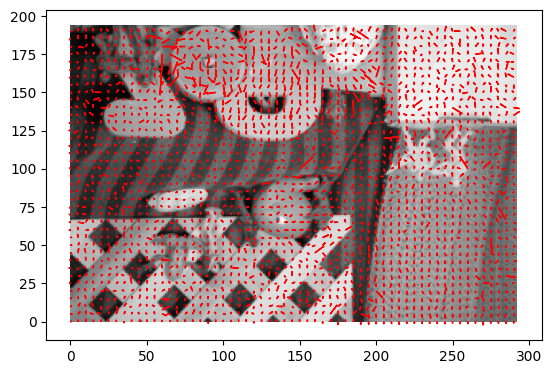

In [32]:
quivstep = 5
scale = 3
fn = None
ax = plt.figure().gca()
ax.imshow(img2, cmap="gray", origin="lower")
# plt.scatter(POI[:,0,1],POI[:,0,0])
for i in range(0, u.shape[0], quivstep):
    for j in range(0, v.shape[1], quivstep):
        ax.arrow(
            j,
            i,
            v[i, j] * scale,
            u[i, j] * scale,
            color="red",
            head_width=0.5,
            head_length=1,
        )

    # plt.arrow(POI[:,0,0],POI[:,0,1],0,-5)
if fn:
    ax.set_title(fn)

plt.draw()
plt.pause(0.01)